In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math,time
import random 
import numpy.random as rd
from decimal import Decimal, ROUND_DOWN
from IPython import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.backends.backend_pdf import PdfPages

np.set_printoptions(precision=3,suppress=True)

In [0]:

"""variable"""
N = 9 # number of individuals
D_weight = 10 # weight of distance
D_max = 0.005 # maximum effect of close neighbour
S_weight = 20 #weight of social affiliation
S_max = 0.2 # maximum effect of close social bond

intrinsic_p = 0.001 #probability to chage state sponteniously


itr = 500 #number of interation of simulation 




In [0]:

"""empty list for results"""
num_ind = np.array([])
phi_distance = np.array([])
soc_distance = np.array([])

def distance(X,Y):
    """function for calculate distance among individuals"""
    res = np.zeros((N,N))
    for i in range(N):
        xdis = X-X[i]
        ydis = Y-Y[i]
        r_dis = (xdis**2+ydis**2)**0.5
        res[i,:] = r_dis

    return res

def calculate_switch_probability(c_dist,c_social,c_state):
    
    social_p = np.sum((S_max*np.exp(-S_weight*(1.0-c_social)))*c_state,axis=-1)
    distance_p = np.sum((D_max*np.exp(-D_weight*c_dist))*c_state,axis=-1)
    return social_p+distance_p+intrinsic_p

In [0]:
# """social affiliation"""
# soc_data = pd.read_csv('soc_mat.csv',sep=",")

# res_soc = soc_data.values
# res_soc = res_soc[:,1:10]
soc_sq = np.random.rand(N, N)
social = np.tril(soc_sq) + np.tril(soc_sq, -1).T
np.fill_diagonal(social,0)

social = np.zeros((N,N))
for i in range(N):
    if i==N-1:
        j=0
    else:
        j=i+1
    social[i,j]=1
    #social[j,i]=1


In [0]:
phi_distance = np.zeros((N-1,itr))
soc_distance = np.zeros((N-1,itr))



follow_count = np.zeros((N,N))
results = np.zeros((N,itr))
distances = np.zeros((itr,N,N))
"""simulation"""
#stdsc = StandardScaler()
mmsc = MinMaxScaler()

for t in range(itr):
    """initial condition"""
    state = np.zeros(shape=(N,)) ##iniitial state
    depart = np.random.randint(0,N)  ## First departure
    state[depart] = 1
    prev = depart
    counter=0
    
    results[counter,t]=depart
    counter+=1
 
    """distance"""
    xpos = np.random.uniform(0,1,N)
    ypos = np.random.uniform(0,1,N)

    res_dist = distance(xpos,ypos)
    distances[t] = res_dist[:]
    # soc_sq = np.random.rand(N, N)
    # social = np.tril(soc_sq) + np.tril(soc_sq, -1).T
    # np.fill_diagonal(social,0)
    
    while np.sum(state)<N:
    
    
        trans_prob = calculate_switch_probability(res_dist,social,state)  #calculate probaility to change state
        
        depart = np.random.randint(0,N)
        
        if np.random.uniform()<trans_prob[depart]:
            if not state[depart]:
                state[depart]=1
                results[counter,t]=depart
                
                
                follow_count[prev,depart]+=1
                
                phi_dist = res_dist[prev,depart]
                phi_distance[counter-1,t] = phi_dist
                
                soc_dist = social[prev,depart]
                soc_distance[counter-1,t] = soc_dist
                
                prev = depart
                
                counter+=1
                
                


np.save('orderings.npy',results) 


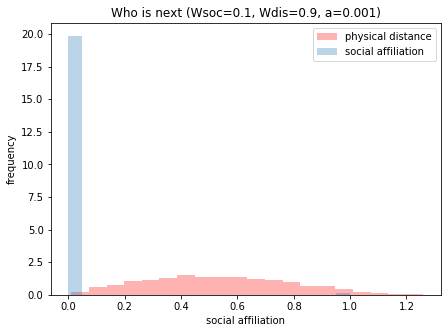

In [61]:
#xx = range(itr*N)

fig = plt.figure(figsize=(7,5))
plt.hist(phi_distance.flatten(),bins=20,color="red",alpha=0.3,density=True)
plt.xlabel("physical distance")
plt.ylabel("frequency")

plt.hist(soc_distance.flatten(),bins=20,alpha=0.3,density=True)
plt.xlabel("social affiliation")
plt.ylabel("frequency")
#plt.show()
plt.legend(['physical distance','social affiliation'])
plt.title("Who is next (Wsoc=0.1, Wdis=0.9, a=0.001)")
#plt.show()

plt.savefig("result.png",dpi=300)


In [55]:
%ls

drive/  orderings.npy  result.png  sample_data/


In [56]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
np.save('drive/My Drive/orderings.npy',results) 
np.save('drive/My Drive/distances.npy',distances) 
np.save('drive/My Drive/social.npy',social) 

In [62]:
results[:,1]

array([6., 5., 4., 3., 2., 1., 0., 8., 7.])